# Supervised Machine Learning Using SKlearn:
### Height & Weight relationship:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


### import dataset:

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/EnggQasim/PGD_Batch2_Machine_Learning/main/class3_Regression_data_types/data/weight-height.csv")

In [3]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [6]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


### checking null and duplicate values:

In [7]:
data.isna().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [8]:
data['Height'].duplicated().sum()

0

In [9]:
data['Weight'].duplicated().sum()

0

### Plotting data on scatter plot:

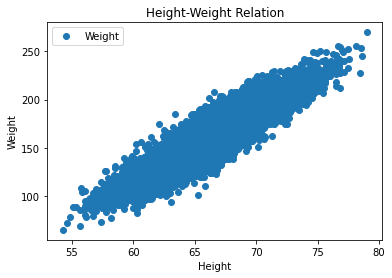

In [11]:
data.plot(x='Height',y='Weight',style='o')
plt.title("Height-Weight Relation")
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

#### it is obvious from the scatter plot that there is a positive relationship between x and y

### Preparing Data:

In [17]:
x = np.array(data['Height']).reshape(-1,1)
y = np.array(data['Weight']).reshape(-1,1)

#### now we have our variables x as an independent and y as a dependent varaiable

### Splitting data into training dataset and testing dataset :

In [18]:
# import package of splitting data from sklearn:
from sklearn.model_selection import train_test_split 

x_test,x_train,y_test,y_train = train_test_split(x,y,test_size=0.2,random_state=0)


### Training the Algorithm:

In [19]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
model = reg.fit(x_train,y_train)

print("training complete")

training complete


### Plotting Regression line:

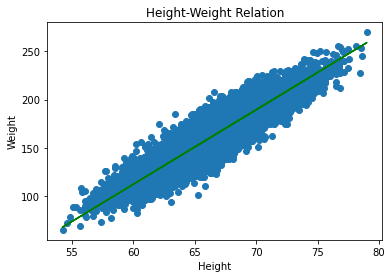

In [22]:
line = reg.coef_*x+reg.intercept_
plt.scatter(x,y)
plt.plot(x,line,color='green')
plt.title("Height-Weight Relation")
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

### Making Predictions:

In [43]:
y_pred = np.array(reg.predict(x_test))


### Comparing Actual data & Predicted data:

In [44]:
pred_data_comparision = pd.DataFrame({'Actual':y_test.tolist(),'Predicted':y_pred.tolist()})

In [45]:
pred_data_comparision

,Actual,Predicted
0,[118.764518263849],[107.12169269077305]
1,[156.778585962843],[142.36648495310124]
2,[211.114809685062],[213.33562655643732]
3,[127.616505950701],[130.8237898415606]
4,[177.067774350773],[193.30958966983542]
...,...,...
7995,[97.263880782195],[115.28204095787612]
7996,[174.156893015953],[164.17287885673431]
7997,[162.475957317792],[169.87853848172927]
7998,[136.783022358855],[128.5031807819542]


In [47]:
a = np.array(70.12).reshape(-1,1)
own_predict = model.predict(a)
print(own_predict)

[[190.43534988]]


### Model Efficiency:

In [49]:
model.score(x_test, y_test)*100

85.4374934990025

### Comment:

predictions from the model are 85.4374934990025% true